In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# getting the datasets
customer_ac=pd.read_csv('C:/Users\Skasiv\Dropbox\My PC (LAPTOP-L8J5JVJ8)\Desktop\case studies to solve\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv').replace("\\" , "/")
spend=pd.read_csv('C:/Users\Skasiv\Dropbox\My PC (LAPTOP-L8J5JVJ8)\Desktop\case studies to solve\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv').replace("\\" , "/")
repay=pd.read_csv('C:/Users\Skasiv\Dropbox\My PC (LAPTOP-L8J5JVJ8)\Desktop\case studies to solve\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv').replace("\\" , "/")


In [3]:
customer_ac

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [5]:
repay

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496,A67,09-May-05,55638.77
1496,1497,A68,10-May-06,319836.49
1497,1498,A69,11-Jul-06,247628.45
1498,1499,A70,12-Aug-05,454016.51


In [6]:
merged=pd.merge(left=pd.merge(left=spend,right=repay,left_on='Sl No:',right_on='SL No:'),right=customer_ac,left_on='Customer_x',right_on='Customer')

In [7]:
merged.head()

,Sl No:,Customer_x,Month_x,Type,Amount_x,SL No:,Customer_y,Month_y,Amount_y,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,A1,12-Jan-04,495414.75,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,2,A1,03-Jan-04,245899.02,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,3,A1,15-Jan-04,259490.06,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,4,A1,25-Jan-04,437555.12,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,5,A1,17-Jan-05,165972.88,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [8]:
merged.rename(columns={'Amount_x':'spend_amount','Month_x':'spend_month','Amount_y':'repay_amount','Month_y':'repay_month'},inplace=True)

In [9]:
# type conversion
merged['spend_month']=pd.to_datetime(merged.spend_month)
merged['repay_month']=pd.to_datetime(merged.repay_month)

## 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.

In [10]:
merged.loc[merged['Age']<18,'Age']=customer_ac.Age.mean()

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [11]:
merged.loc[merged['spend_amount']>merged['Limit'],'spend_amount']=merged.Limit*0.5

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [12]:
merged.loc[merged['repay_amount']>merged['Limit'],'repay_amount']=merged.Limit

## 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [13]:
print('distinct customers :',customer_ac.Customer.nunique())

distinct customers : 100


### b. How many distinct categories exist?

In [14]:
print('distinct categories :',customer_ac.Segment.nunique())

distinct categories : 5


### c. What is the average monthly spend by customers?

In [15]:
merged.groupby(merged.spend_month.dt.strftime('%B'))['spend_amount'].mean().to_frame()

,spend_amount
spend_month,
April,135035.927333
August,165759.596190
December,117272.680357
February,151261.565126
January,147770.183266
July,166326.817857
June,182037.731429
March,131840.761861
May,151623.982190


### d. What is the average monthly repayment by customers?

In [16]:
merged.groupby(merged.repay_month.dt.strftime('%B'))['repay_amount'].mean().to_frame()

,repay_amount
repay_month,
April,167676.814933
August,152817.425510
December,190138.995000
February,158873.098158
January,163445.534263
July,165203.918980
June,114146.549375
March,156430.854155
May,186097.903985


### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [17]:
summ1=merged.groupby(merged.spend_month.dt.strftime('%B'))[['spend_amount','repay_amount']].sum()


In [18]:
summ1['Monthly Profit']=summ1['repay_amount']-summ1['spend_amount']

In [19]:
summ1['Profit']=summ1['Monthly Profit'].apply(lambda x: (x*2.9)/100 if x>0 else 0)

In [20]:
summ1

,spend_amount,repay_amount,Monthly Profit,Profit
spend_month,,,,
April,20255389.10,22603105.77,2347716.67,68083.78343
August,6961903.04,7417302.86,455399.82,13206.59478
December,3283635.05,4501177.68,1217542.63,35308.73627
February,36000252.50,43694222.47,7693969.97,223125.12913
January,51571793.96,55624916.35,4053122.39,117540.54931
July,6985726.35,5860216.33,-1125510.02,0.00000
June,10194112.96,9836600.93,-357512.03,0.00000
March,30455215.99,35703231.51,5248015.52,152192.45008
May,31841036.26,34486564.82,2645528.56,76720.32824


### f. What are the top 5 product types?

In [21]:
merged.groupby('Type')['Type'].count().to_frame().rename(columns={'Type':'Total Quantity Sold'}).sort_values('Total Quantity Sold',ascending=False).head(5)


,Total Quantity Sold
Type,
PETRO,200
CAMERA,160
FOOD,160
AIR TICKET,147
TRAIN TICKET,132


### g. Which city is having maximum spend?

In [22]:
merged.groupby('City')['spend_amount'].sum().reset_index().sort_values('spend_amount',ascending=False).head(1)

,City,spend_amount
4,COCHIN,45963513.5


### h. Which age group is spending more money?

In [23]:
merged.groupby(pd.cut(merged.Age,range(18,88,8)))['spend_amount'].sum().to_frame().sort_values('spend_amount',ascending=False).head(1)

,spend_amount
Age,
"(42, 50]",53242390.7


### i. Who are the top 10 customers in terms of repayment?

In [24]:
merged.groupby('Customer_y')['repay_amount'].sum().to_frame().sort_values('repay_amount',ascending=False).head(10)

,repay_amount
Customer_y,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [25]:
summ2=merged.groupby([merged.spend_month.dt.strftime('%Y'),
                merged.City,merged.Product])['spend_amount'].sum().reset_index().rename(columns={'spend_month':'Year'}).pivot_table(index='City',columns=['Year','Product'],values='spend_amount',aggfunc='sum')
summ2

Year              2004                                 2005              \
Product           Gold    Platimum      Silver         Gold    Platimum   
City                                                                      
BANGALORE   9289878.54  1112732.30  1291852.58  12892362.99   912284.97   
BOMBAY      6987853.53   897264.94   532089.03   8983018.28   711804.94   
CALCUTTA    7477140.98  2037690.30   500006.00  10303355.80  4434696.31   
CHENNAI     1059618.50  3535652.38   282056.86   3740945.58  5053956.32   
COCHIN      7315850.15  3419904.07   814229.62  12110613.03  4960921.71   
DELHI       2806495.00   283512.89   768172.30   1964845.27   494157.86   
PATNA       2072567.90  1113069.60   756684.10   3252615.77  2883231.07   
TRIVANDRUM  2415102.84  2161676.67   209667.48   1240375.85  3601443.30   

Year                          2006                          
Product        Silver         Gold    Platimum      Silver  
City                                                        
BANGALORE   830612.34  12030611.09   685831.27  1415480.94  
BOMBAY      508988.54   7917144.31   972130.01  1092833.80  
CALCUTTA    440147.06  11167532.77  3589606.66  1157956.42  
CHENNAI     377184.49   2704288.62  5024923.40   350009.50  
COCHIN      652269.38  10499142.38  4920592.29  1269990.87  
DELHI       612311.21   2957103.32   176788.72   854899.97  
PATNA       950094.19   2276181.69  1256137.65   700005.00  
TRIVANDRUM  269912.99   2735710.87  2147403.75   555862.12

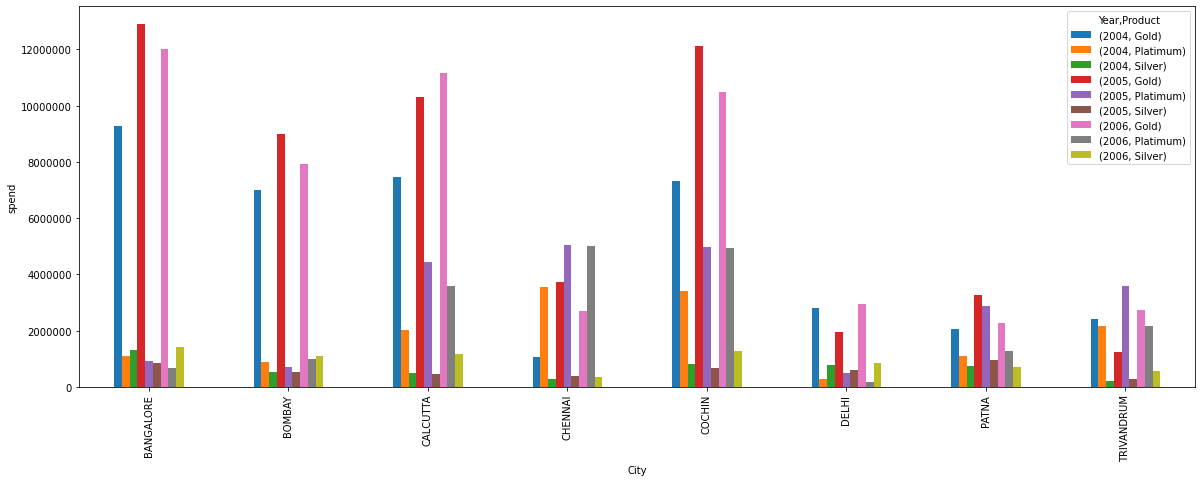

In [26]:
summ2.plot(kind='bar',figsize=(20,7))
plt.ticklabel_format(axis='y',style='plain')
plt.ylabel('spend')
plt.show()

## 4. Create graphs for  
### a. Monthly comparison of total spends, city wise

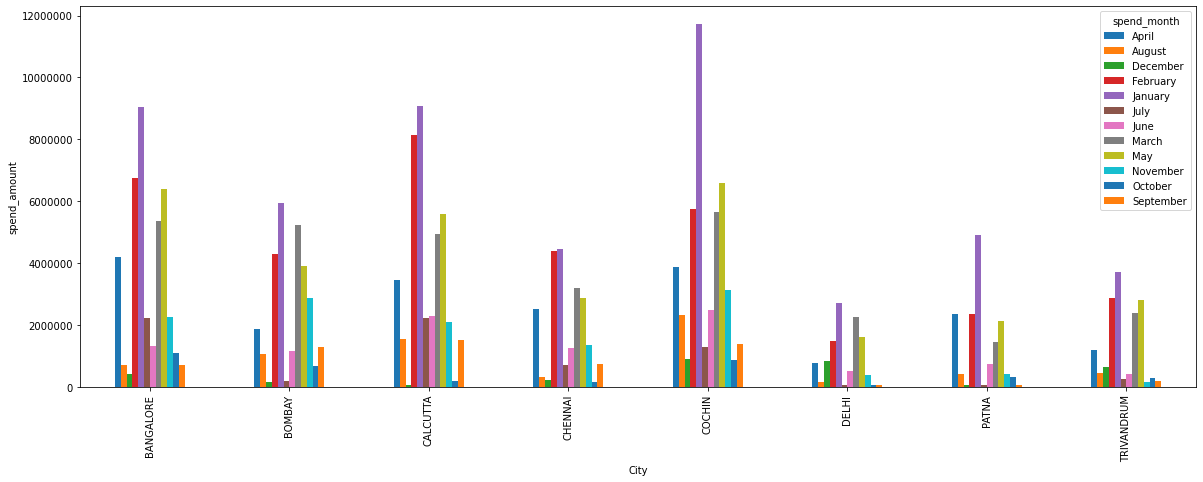

In [27]:
merged.pivot_table(index='City',columns=merged.spend_month.dt.strftime('%B'),values='spend_amount',aggfunc='sum').plot(kind='bar',figsize=(20,7))
plt.ylabel('spend_amount')
plt.ticklabel_format(axis='y',style='plain')
plt.show()

### b. Comparison of yearly spend on air tickets

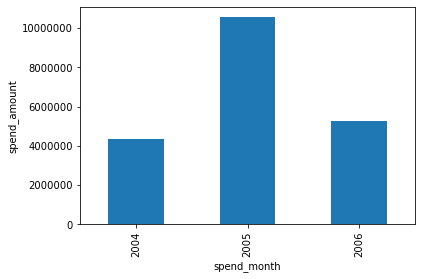

In [28]:
merged[merged.Type=='AIR TICKET'].groupby(merged.spend_month.dt.strftime('%Y'))['spend_amount'].sum().plot(kind='bar')
plt.ticklabel_format(axis='y',style='plain')
plt.ylabel('spend_amount')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

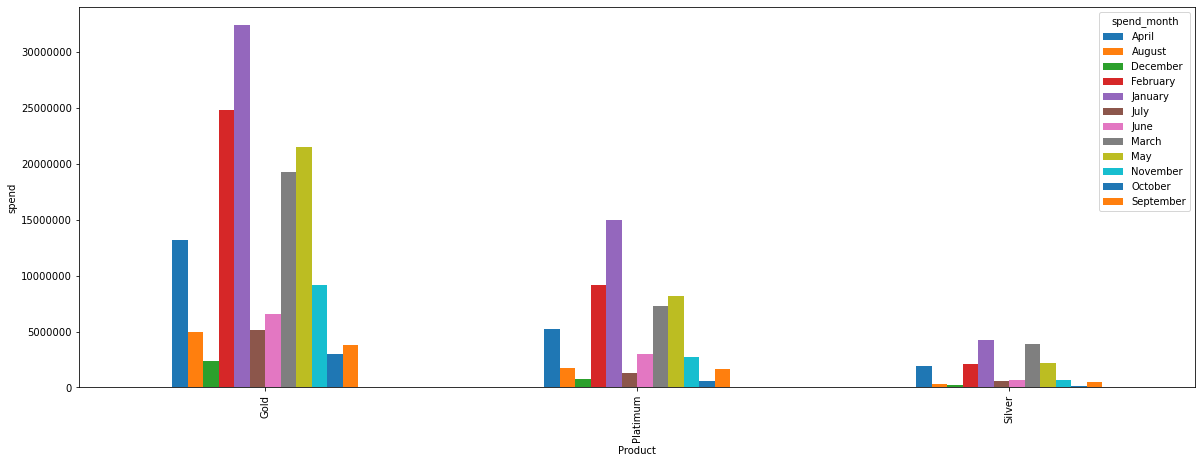

In [29]:

merged.groupby([merged.spend_month.dt.strftime('%B'),merged.Product])['spend_amount'].sum().reset_index().pivot_table(index='Product',columns='spend_month',values='spend_amount').plot(kind='bar',figsize=(20,7))
plt.ylabel('spend')
plt.ticklabel_format(axis='y',style='plain')
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers

In [30]:
def analysis(x,y):
    print('analysis for',x)
    if y.lower()=='yearly':
        ans=merged[merged.Product==x].groupby([merged.City,merged.repay_month.dt.strftime('%Y'),merged.Customer_y])['repay_amount'].sum().reset_index().rename(columns={'Customer_y':'Customers','repay_month':'year'}).sort_values(by=['City','year','repay_amount'],ascending=[True,True,False],ignore_index=True)
        pd.set_option('display.max_rows', ans.shape[0]+1)
        return ans
    elif y.lower()=='monthly':
        ans=merged[merged.Product==x].groupby([merged.City,merged.repay_month.dt.strftime('%B'),merged.Customer_y])['repay_amount'].sum().reset_index().rename(columns={'Customer_y':'Customers','repay_month':'month'}).sort_values(by=['City','month','repay_amount'],ascending=[True,True,False],ignore_index=True)
        pd.set_option('display.max_rows', ans.shape[0]+1)
        return ans

product=input('please enter the product :')
time=input('please enter the time period (yearly or monthly) :')
analysis(product,time)

please enter the product :Gold
please enter the time period (yearly or monthly) :yearly
analysis for Gold


,City,year,Customers,repay_amount
0,BANGALORE,2004,A14,2770261.30
1,BANGALORE,2004,A1,2359797.84
2,BANGALORE,2004,A13,2337012.77
3,BANGALORE,2004,A43,1906497.47
4,BANGALORE,2004,A30,978777.17
5,BANGALORE,2004,A63,788855.60
6,BANGALORE,2005,A43,4006956.60
7,BANGALORE,2005,A13,3757673.00
8,BANGALORE,2005,A30,2667746.38
9,BANGALORE,2005,A14,2491981.61
